<table class="ee-notebook-buttons" align="left">
    <td><a target="_parent"  href="https://github.com/rubensdmp/StratiLib/blob/main/tutorials/03_Write_SedLog_Data.ipynb"><img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /> View source on GitHub</a></td>
    <td><a target="_parent"  href="https://nbviewer.jupyter.org/github/rubensdmp/StratiLib/blob/main/tutorials/03_Write_SedLog_Data.ipynb"><img width=26px src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Jupyter_logo.svg/883px-Jupyter_logo.svg.png" />Notebook Viewer</a></td>
    <td><a target="_parent"  href="https://colab.research.google.com/github/rubensdmp/StratiLib/blob/main/tutorials/03_Write_SedLog_Data.ipynb"><img width=26px src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a></td>
</table>

# 03. Write SedLog Data 

## In thise notebook you can see how write a SedLog csv file to be loaded in SedLog 3.1

Created by: [Rubens Merlino](https://www.linkedin.com/in/rubens-merlino-uy/)

## Install StratiLib

You can find more details in the [github source page of StratiLib](https://github.com/rubensdmp/StratiLib)

In [1]:
# Installs stratilib package
import subprocess

try:
    import stratilib as sl
except ImportError:
    print('stratilib package not installed. Installing ...')
    subprocess.check_call(["python", '-m', 'pip', 'install', 'stratilib'])


### READ SEDLOG CSV FILE

read_sedlog() read the csv file exported by SedLog 3.1 and create a Pandas Dataframe with the specific stratiLib information. <br>

In [2]:
#example read file and see the dataframe generated
df = sl.read_litho('data/To_SedLog.xlsx')
df.head()

,FM,TOP,BASE,THICKNESS,LITHOLOGY,GRAINB,GRAINT,CONTACT,DESC,STRUCTURES,...,LITHOLOGY_2_%,LITHOLOGY_3,LITHOLOGY_3_%,GRAINSZ,LITH1%,LITH2,LITH2%,LITH3,LITH3%,LITH1
0,NaN,0.0,50.0,50,F,1.00,1.00,S,,int,...,NaN,NaN,NaN,,1.00,NaN,0.00,NaN,0.0,18000
1,Fm A,50.0,350.0,300,Fa,1.00,1.00,G,,NaN,...,38.0,NaN,NaN,,0.62,26000.0,0.38,NaN,0.0,33000
2,Fm B,350.0,450.0,100,cg,1.00,1.00,e,,mc,...,NaN,NaN,NaN,,1.00,NaN,0.00,NaN,0.0,14000
3,Fm B,450.0,650.0,200,s,0.75,0.68,s,,"r,cr",...,NaN,NaN,NaN,,1.00,NaN,0.00,NaN,0.0,11000
4,Fm B,650.0,750.0,100,cg,1.00,1.00,e,,nac,...,NaN,NaN,NaN,,1.00,NaN,0.00,NaN,0.0,14000


### PLOT INFORMATION

plot_litho() plot stratigraphic column you can give it some parameters:

**Mandatory:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Pandas dataframe** from read_litho() or read_sedlog()<br>
**Optionals:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**top = number** depth to plot, default top of depth<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**base = number** bottom depth to plot, default bottom of depth<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**width = number** width of plot<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**length = number** length of plot<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**title = number** title of plot<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**suptit = title** of the figure<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**color_fill = True**: fill lithologys with color, default = True<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**show_fossils = True**: Show fossils, default = False<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**show_structs = True**: show sedimentary structures, default = False<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**struct_out = True**: show sedimentary structures in new plot, default = False<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**fossil_out = True**: show fossils in new plot, default = False<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**show_fm = True**: show formations, default = False<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**fm_rot = number**: rotation of the name of formations <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**fm_size = number**: font size of the name of formations<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**show_gr = True**: show grain size, default = True<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ticks = number**: step of ticks<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**tick_unit**: ticks unit<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**none_length = {0.0 - 1.0}**: width of none lithology in the plot, default 1.0<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**only_first_lith = True**: show only first lithology if you have more than once in file<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**show_des = True**: show descriptions in new plot<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**save_fig = name**of file to be saved<br>

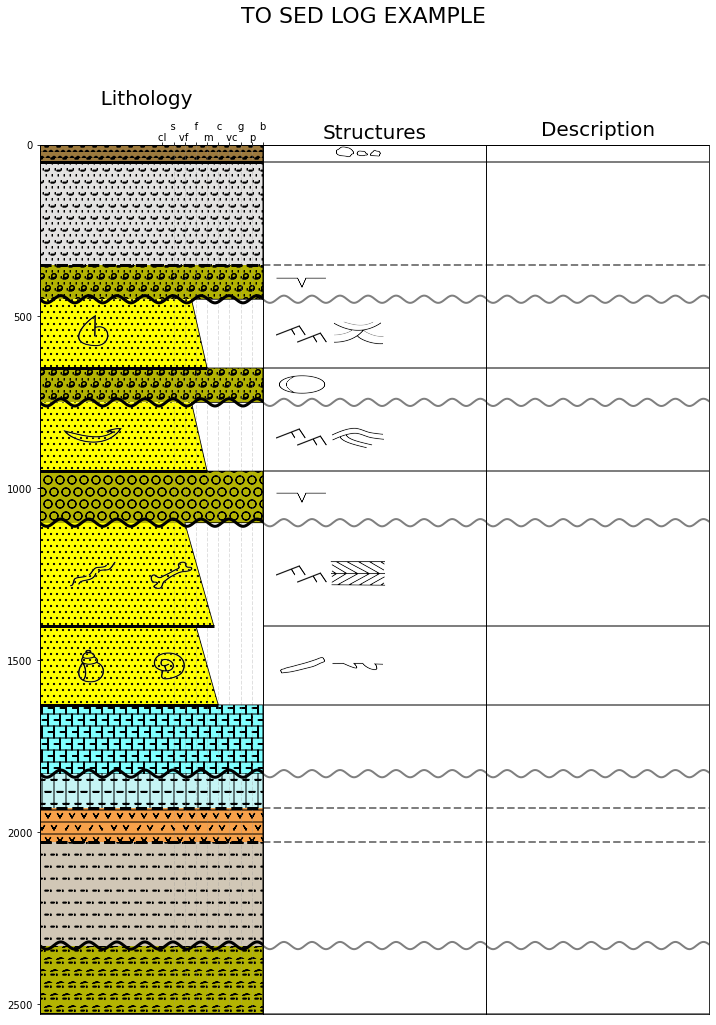

In [3]:
#Example
sl.plot_litho(df, 
              show_gr=True,
              none_length=0.6,
              suptit = 'TO SED LOG EXAMPLE',
              show_structs=True, 
              show_fossils=True, 
              struct_out =True,
              fossil_out =False,
              show_des = True,
              suavizar = False,
              only_first_lith = True,
              show_fm = False
              )

### Now we see the specific lithologies for the column


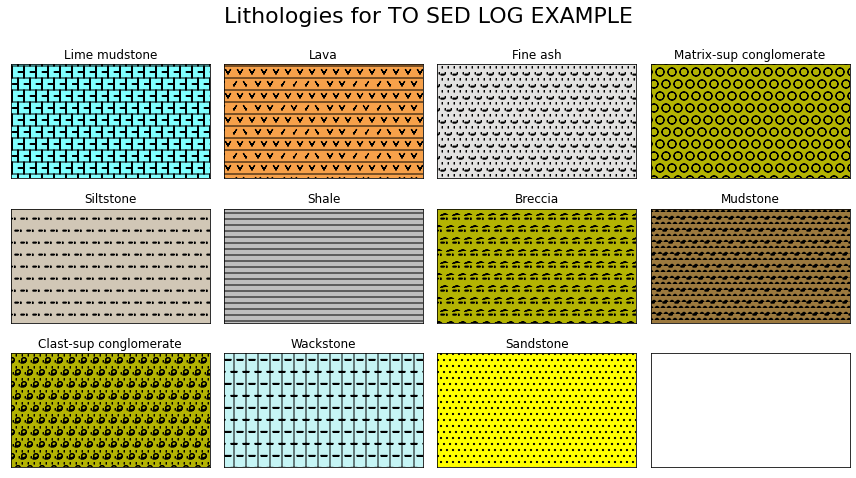

In [4]:
sl.show_litho(df = df, tit ='Lithologies for TO SED LOG EXAMPLE', cols = 4)

### Plot the only structures presents in the plot:

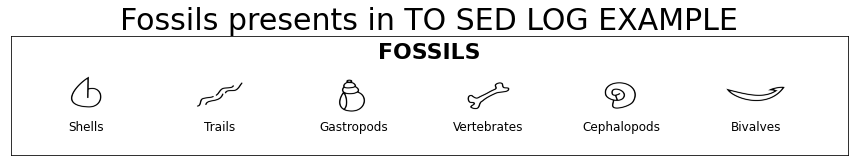

In [5]:
sl.show_structs(df = df, tit = 'Fossils presents in TO SED LOG EXAMPLE', plot='fossils')

### Export file to sedLog


In [16]:
#Export to SedLog
sl.to_sedlog_csv(df=df, name= 'To_sedLog')

,THICKNESS (CM),BASE BOUNDARY,LITHOLOGY,LITHOLOGY %,LITHOLOGY2,LITHOLOGY2 %,LITHOLOGY3,LITHOLOGY3 %,GRAIN SIZE BASE,PHI VALUES BASE,...,BIOTURBATION TYPE,INTENSITY,PALAEOCURRENT VALUES,FACIES,OTHER1 TEXT,OTHER1 SYMBOL,OTHER2 TEXT,OTHER2 SYMBOL,OTHER3 TEXT,OTHER3 SYMBOL
0,200.0,<none>,Breccia,100.0,<none>,0.0,<none>,0.0,boulder,-10.0,...,<none>,0,"""""",0,"""""","""""","""""","""""","""""",""""""
1,300.0,<none>,Siltstone,100.0,<none>,0.0,<none>,0.0,boulder,-10.0,...,<none>,0,"""""",0,"""""","""""","""""","""""","""""",""""""
2,100.0,<none>,Lava,100.0,<none>,0.0,<none>,0.0,boulder,-10.0,...,<none>,0,"""""",0,"""""","""""","""""","""""","""""",""""""
3,100.0,<none>,Wackstone,70.0,Shale,30.0,<none>,0.0,boulder,-10.0,...,<none>,0,"""""",0,"""""","""""","""""","""""","""""",""""""
4,200.0,<none>,Lime mudstone,100.0,<none>,0.0,<none>,0.0,boulder,-10.0,...,<none>,0,"""""",0,"""""","""""","""""","""""","""""",""""""
5,230.0,<none>,Sandstone,100.0,<none>,0.0,<none>,0.0,c,0.5,...,<none>,0,"""""",0,"""""","""""","""""","""""","""""",""""""
6,300.0,<none>,Sandstone,100.0,<none>,0.0,<none>,0.0,m/c,1.0,...,<none>,0,"""""",0,"""""","""""","""""","""""","""""",""""""
7,150.0,Erosion,Matrix-supported conglomerate,100.0,<none>,0.0,<none>,0.0,boulder,-10.0,...,<none>,0,"""""",0,"""""","""""","""""","""""","""""",""""""
8,200.0,<none>,Sandstone,100.0,<none>,0.0,<none>,0.0,m,1.5,...,<none>,0,"""""",0,"""""","""""","""""","""""","""""",""""""
9,100.0,Erosion,Clast-supported conglomerate,100.0,<none>,0.0,<none>,0.0,boulder,-10.0,...,<none>,0,"""""",0,"""""","""""","""""","""""","""""",""""""
